У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv('../data/yulu_rental.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

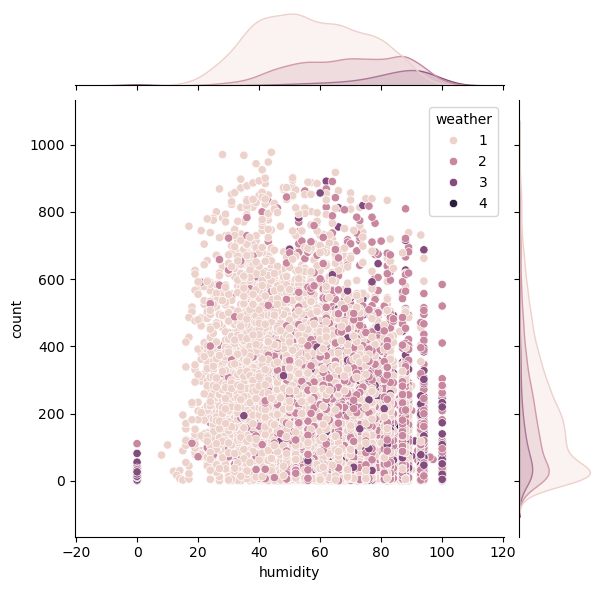

In [36]:
sns.jointplot(x = 'humidity', y = 'count', data = df, hue="weather")
plt.show();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

Максимальна кількість оренд велосипедів припадає на рівень вологості від 30% до 60%. За низької вологості (<20%) та високої (>80%) кількість оренд помітно зменшується.
Найвища активність користувачів спостерігається за ясної погоди(weather-1). Хмарні та туманні дні(weather-2) також генерують попит, хоча він значно менший. Натомість у складних погодних умовах оренда велосипедів різко скорочується(weather-3,4).
Найбільша концентрація оренд на графіку спостерігається при вологості в діапазоні 30-70% за сприятливих погодних умов.
Сприятливі погодні умови та рівень вологості в діапазоні 30-70% забезпечують найбільший попит на оренду велосипедів — маркетингові зусилля варто спрямувати на використання цих умов.
За складних погодних умов попит значно знижується, тому доцільно зосередитися на його стимулюванні за допомогою акцій та спеціальних пропозицій.

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [11]:
spr_and_sum = df.query('season in [1, 2]')

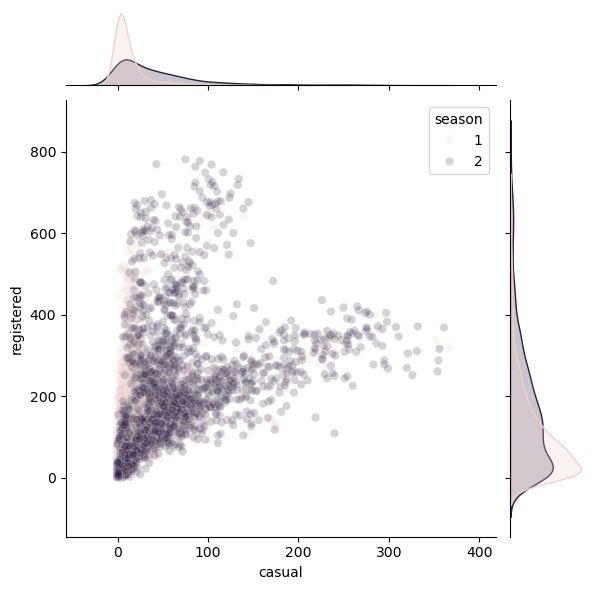

In [40]:
sns.jointplot(x = 'casual', y = 'registered', data = spr_and_sum, hue = 'season', alpha = 0.2)
plt.show();

Дані показують, що максимальна кількість зареєстрованих і неформальних користувачів припадає на літній сезон (сезон 2). Зареєстровані користувачі значно частіше користуються велосипедами влітку порівняно з весною, тоді як casual користувачі переважно активні лише влітку.
Найбільша концентрація користувачів спостерігається при кількості 0–200 для зареєстрованих і 0–100 для casual користувачів. Це свідчить про те, що більшість оренд здійснюється невеликою кількістю людей, що може вказувати на потенціал для розширення бази користувачів, особливо навесні.
Зареєстровані користувачі демонструють значно вищий рівень активності, що робить їх ключовою цільовою аудиторією для бізнесу. Оскільки пік використання припадає на літній сезон, саме на цей період слід спрямувати основні маркетингові зусилля.
Високу активність неформальних користувачів в літній період показує їх потенціал.Варто використовувати маркетингові програми для залучення разових поїздок.
Низька активність навесні характера для двух групп - варто стимулювати попит через маркетингові пропозиції.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


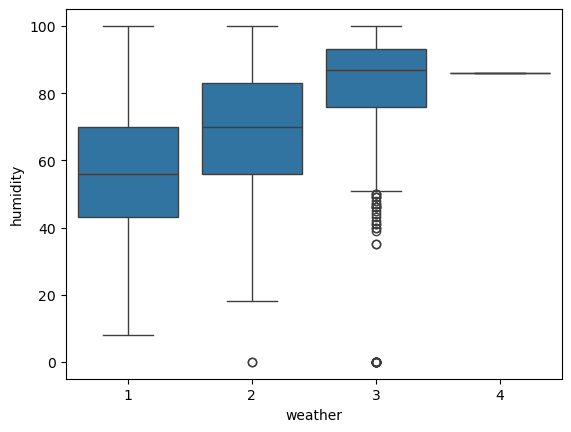

In [54]:
sns.boxplot(x='weather', y = 'humidity', data = df)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

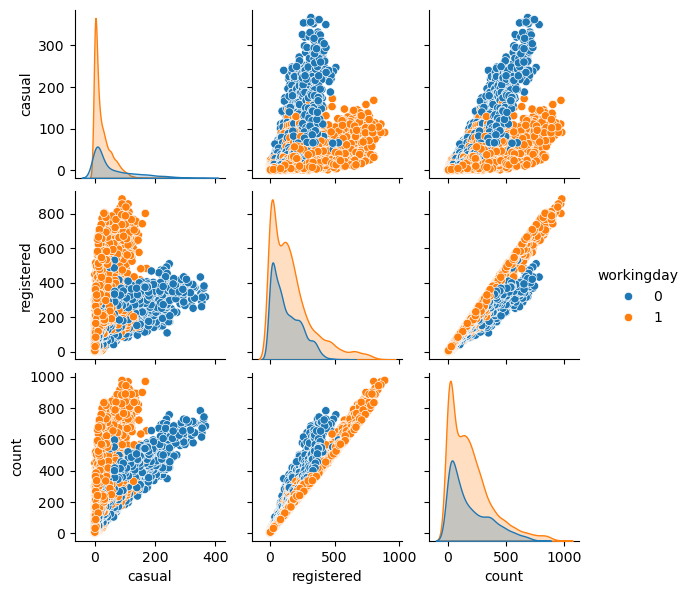

In [50]:
df_pair = df[['casual','registered','count','workingday']]
sns.pairplot(df_pair, hue = 'workingday', height = 2)
plt.show();

На графіку представлений розподіл неформальних користувачів(casual),зареєстрованих користувачів(registered) та загальна кількість велосипедів,взяти в оренду(count) в робочі(1) та святкові і вихідні дні(0).

Поведінка неформальних користувачів в робочі та вихідні дні значно відрізняється. Спостерігаємо в робочі дні найвищу щільність графіку та максимальне значення від 0 до 200 орендованих велосипедів.У святкові та вихідні дні спостерігається ширший розкид даних і зростання кількості оренд,причому максимальні значення припадають саме на ці дні.

Для зареєстрованих користувачів спостерігається прямий зв'язок між кількістю оренд та робочими днями, причому максимальні значення оренди припадають саме на ці дні.

Загалом, можна зробити висновок, що в робочі дні спостерігається стабільніший попит серед зареєстрованих користувачів, тоді як у святкові та вихідні дні попит серед неформальних користувачів є більш змінним, але на більш високому рівні оренд.

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [22]:
df['datetime'] = pd.to_datetime(df.datetime)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [24]:
df['date'] = df.datetime.dt.date

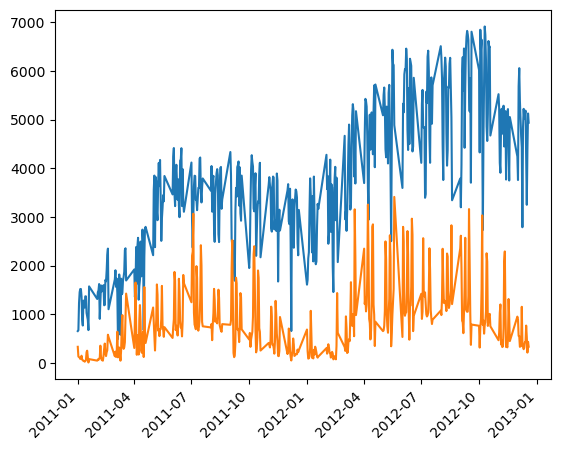

In [52]:
df_viz = df[['date', 'registered', 'casual']]
df_viz = df_viz.groupby('date').sum().reset_index()
plt.plot('date', 'registered', data = df_viz)
plt.plot('date', 'casual', data = df_viz)
plt.xticks(rotation = 45, ha = 'right')
plt.show();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
